# Proyek Analisis Data: Bike Sharing
- **Nama:** Shinta Praylina
- **Email:** shintapraylina007@gmail.com
- **ID Dicoding:** shinta_praylina_t3lo

## Menentukan Pertanyaan Bisnis

- What season do most and least people rent bicycles?


- Is there a difference in the number of bicycle renters each month?

## Import Semua Packages/Library yang Digunakan

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from google.colab import drive


# sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')
phatData="/content/drive/MyDrive/day.csv"
df = pd.read_csv(phatData)
df.info()
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11

**Insight:**

ini menampilkan data info dari data set yang tersedia

### Assessing Data

Jumlah nilai yang hilang dalam setiap kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah nilai yang duplikat:
0


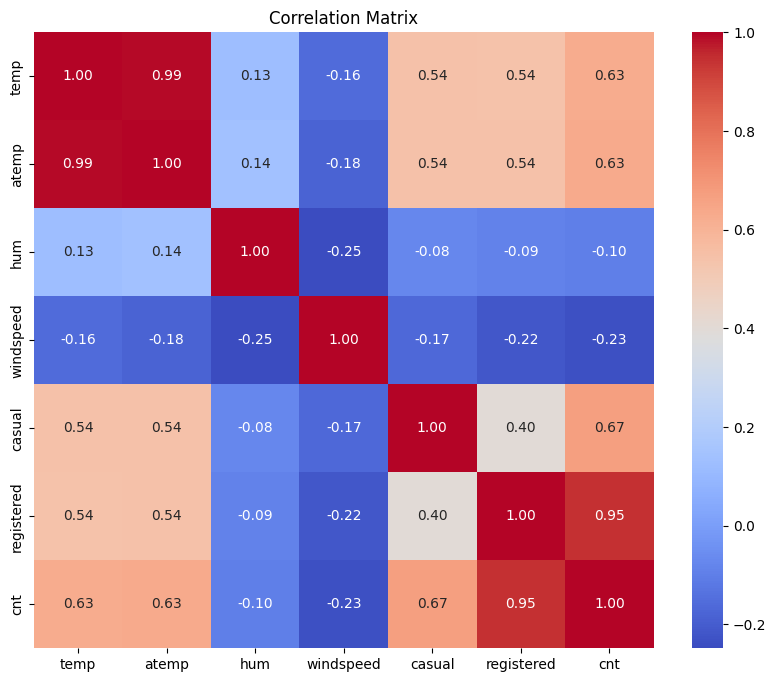

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

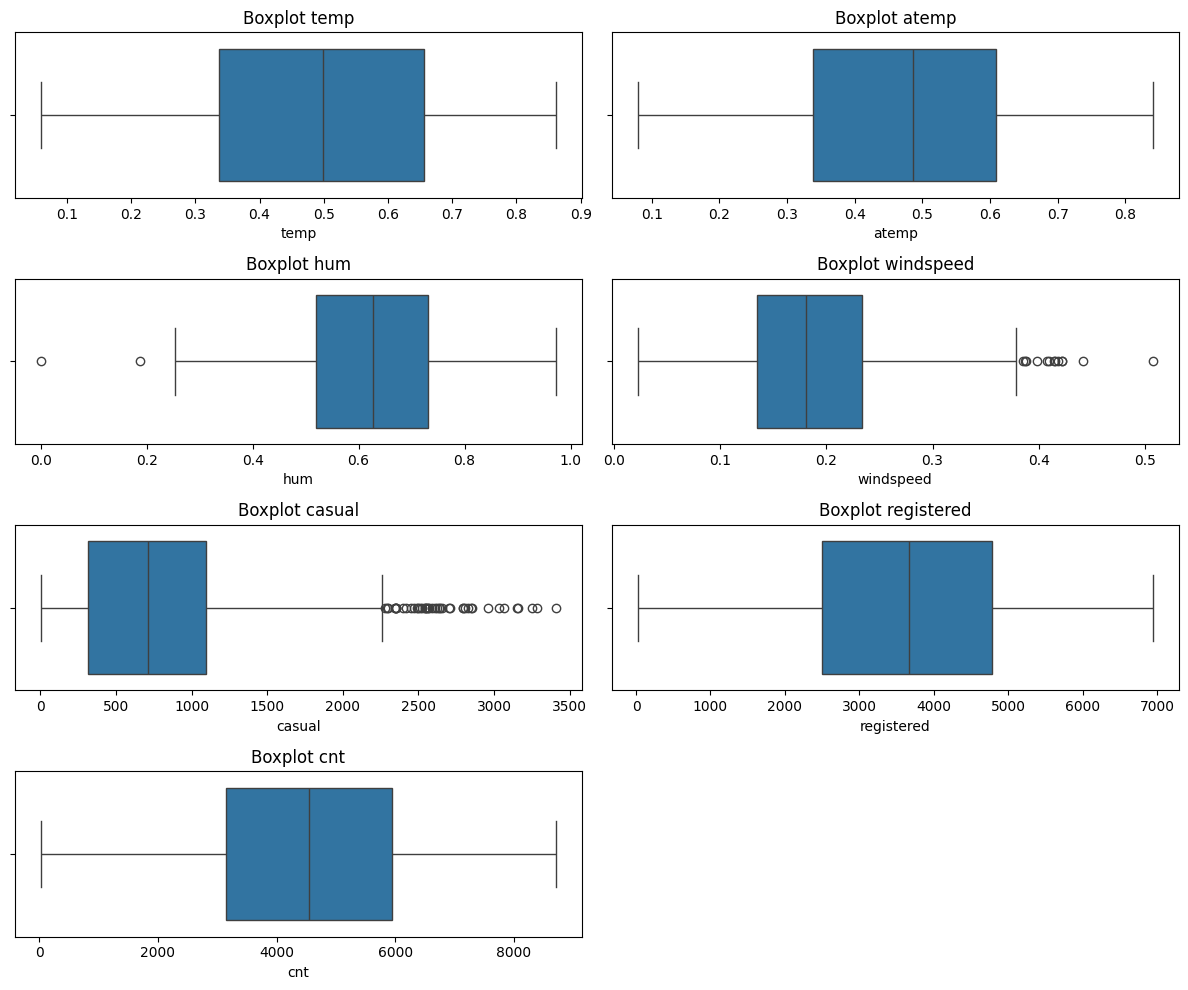

In [ ]:
missing_val = df.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_val)

# Data duplikat
duplicate_data = df.duplicated().sum()
print("Jumlah nilai yang duplikat:")
print(duplicate_data)

num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Korelasi data
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Outlier data
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

**Insight:**

Bagian ini memeriksa dan menampilkan jumlah data duplikat, jumlah data yang hilang, korelasi antar variabel, dan outlier pada setiap variabel.

### Cleaning Data

In [ ]:
# Hapus data row yang data nya hilang
df_no_missing = df.dropna()
# Menghapus duplikasi jika ada
df_cleaned = df_no_missing.drop_duplicates()

**Insight:**

Tahap cleaning data ini sepertinya kurang diperlukan karena dataset yang digunakan sudah cukup bersih dan tidak memiliki data yang hilang atau duplikat.

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-23-537ac3a18343>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_rental_data, x='season', y='cnt', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

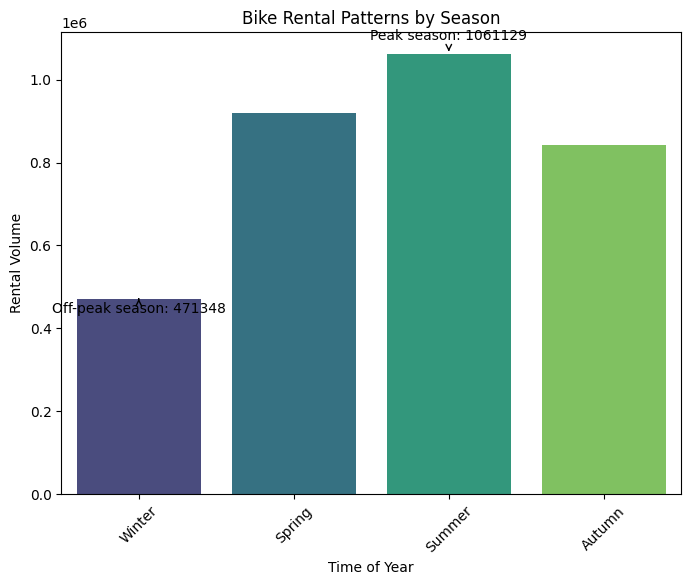

In [ ]:
# Hitung jumlah total penyewaan berdasarkan musim
seasonal_rental_data = df.groupby('season')['cnt'].sum().reset_index()

# Tentukan dictionary untuk map season numbers ke label yang sesuai
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
seasonal_rental_data['season'] = seasonal_rental_data['season'].map(season_mapping)

# Temukan musim dengan penyewaan terbanyak dan paling sedikit
peak_season = seasonal_rental_data.loc[seasonal_rental_data['cnt'].idxmax()]
off_peak_season = seasonal_rental_data.loc[seasonal_rental_data['cnt'].idxmin()]

# Membuat bar plot untuk visualisasi data nya
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_rental_data, x='season', y='cnt', palette='viridis')

# Menambahkan anotasi untuk peak and off-peak seasons
plt.annotate(f"Peak season: {peak_season['cnt']}", xy=(peak_season['season'], peak_season['cnt']), xytext=(0, 10), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))
plt.annotate(f"Off-peak season: {off_peak_season['cnt']}", xy=(off_peak_season['season'], off_peak_season['cnt']), xytext=(0, -10), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))

plt.title('Bike Rental Patterns by Season')
plt.xlabel('Time of Year')
plt.ylabel('Rental Volume')
plt.xticks(rotation=45)
plt.show()

**Insight:**
disiini saya menampilkan descrip dari dataset dan juga data penyewa berdasarkan musim disini terlihat musim panas paling tinggi

## Visualization & Explanatory Analysis

### What season do most and least people rent bicycles?

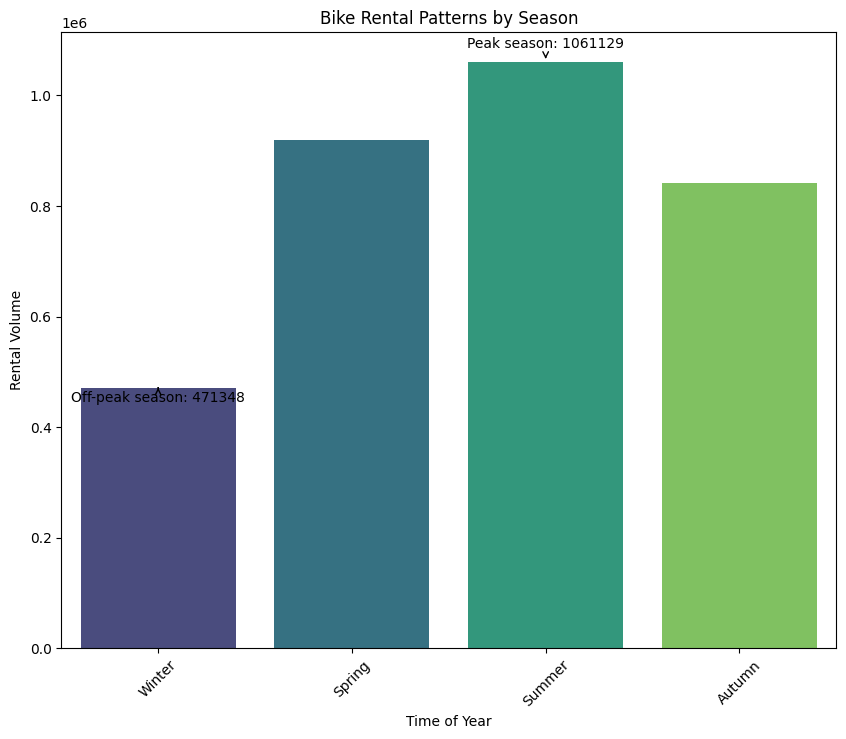

In [ ]:

df = pd.read_csv('/day.csv')
# Hitung jumlah total penyewaan berdasarkan musim
seasonal_rental_data = df.groupby('season')['cnt'].sum().reset_index()

# Tentukan dictionary untuk map season numbers ke label yang sesuai
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
seasonal_rental_data['season'] = seasonal_rental_data['season'].map(season_mapping)

# Temukan musim dengan penyewaan terbanyak dan paling sedikit
peak_season = seasonal_rental_data.loc[seasonal_rental_data['cnt'].idxmax()]
off_peak_season = seasonal_rental_data.loc[seasonal_rental_data['cnt'].idxmin()]

# Membuat bar plot untuk visualisasi data nya
plt.figure(figsize=(10, 8))
sns.barplot(data=seasonal_rental_data, x='season', y='cnt', palette='viridis')

# Menambahkan anotasi untuk peak and off-peak seasons
plt.annotate(f"Peak season: {peak_season['cnt']}", xy=(peak_season['season'], peak_season['cnt']), xytext=(0, 10), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))
plt.annotate(f"Off-peak season: {off_peak_season['cnt']}", xy=(off_peak_season['season'], off_peak_season['cnt']), xytext=(0, -10), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))

plt.title('Number of Bike Rental Patterns by Season')
plt.xlabel('Time of Year')
plt.ylabel('Rental Volume')
plt.xticks(rotation=45)
plt.show()

**Insight:**

Disini saya menampilkan grafik untuk menunjukan perbedaan jumlah penyewa sepeda berdasarkan musim, dan ditarik kesimpulan bahwa summer merupakan musim yang memiliki jumlah penyewa terbanyak, sedangkan winter memiliki jumlah penyewa paling sedikit.

### Is there a difference in the number of bicycle renters each month?

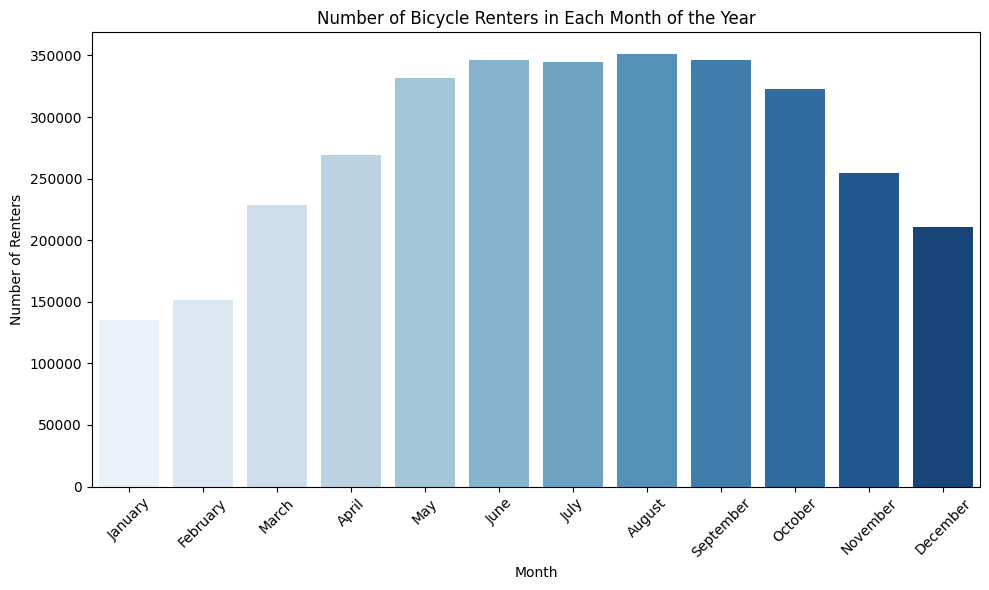

In [ ]:

# Menghitung jumlah penyewa sepeda pada setiap bulan dalam setahun
month_counts = df.groupby('mnth')['cnt'].sum().reset_index()

# Mengganti nilai 1-12 dengan label bulan yang lebih jelas
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_counts['mnth'] = month_counts['mnth'].map(month_labels)

# Membuat plot untuk menampilkan hasil
plt.figure(figsize=(10, 6))
sns.barplot(data=month_counts, x='mnth', y='cnt', palette='Blues')
plt.title('Number of Bicycle Renters in Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Renters')
plt.xticks(rotation=45)  # Menambahkan rotasi label untuk memudahkan pembacaan
plt.tight_layout()  # Menambahkan plt.tight_layout() untuk membuat grafik menjadi lebih presisi
plt.show()

**Insight:**

Disini saya menampilkan grafik dari penyewa sepeda berdasarkan bulan dalam se tahun.

## Analisis Lanjutan (Opsional)

In [ ]:
# Menghitung Recency
df['dteday'] = pd.to_datetime(df['dteday'])
last_date = df['dteday'].max()
df['Recency'] = (last_date - df['dteday']).dt.days

# Menghitung Frequency dan Monetary
frequency = df.groupby('registered')['cnt'].count().reset_index(name='Frequency')
monetary = df.groupby('registered')['cnt'].sum().reset_index(name='Monetary')

# Menggabungkan data Frequency dan Monetary
rfm = pd.merge(frequency, monetary, on='registered')

# Menghitung Recency untuk setiap pelanggan yang terdaftar
rfm['Recency'] = df.groupby('registered')['Recency'].mean().reset_index(drop=True)

print('RFM Analysis:')
print(rfm)

RFM Analysis:
     registered  Frequency  Monetary  Recency
0            20          1        22     63.0
1           416          1       431    704.0
2           432          1       441      5.0
3           451          1       754    372.0
4           472          1       506    705.0
..          ...        ...       ...      ...
674        6844          1      7572     89.0
675        6898          1      7693     68.0
676        6911          1      7691     82.0
677        6917          1      8167    101.0
678        6946          1      7733     96.0

[679 rows x 4 columns]


## Conclusion

Dari grafik 1 kita bisa melihat bahwa musim panas (summer) memiliki jumlah penyewa tertinggi dibandingkan dengan 3 musim yang lainnya, sedangkan musim dingin (winter) memiliki jumlah penyewa paling sedikit diantara musim yang lain.Hal ini membuktikan bahwa musim mempengaruhi jumlah penyewa sepeda.

Lalu grafik kedua menunjukkan bahwa terdapat perbedaan jumlah penyewa sepeda di tiap bulan, dan jumlah penyewa sepeda tertinggi terjadi pada bulan Agustus.